<a href="https://colab.research.google.com/github/anirudhmandula/employeeattritionmodel/blob/main/employee_retention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Overview:
1470 rows (employees)
35 features (columns)
Target column: Attrition (employee retention)

Variable analysis
Numeric: Age, MonthlyIncome, TotalWorkingYears, YearsAtCompany, etc
Categorical: Department, JobRole, BusinessTravel, MaritalStatus, etc
Not relevant: Employee Count, StandardHours, EmployeeNumber

Correlations:
YearsAtCompany correlates strongly with YearsWithCurrManager and YearsInCurrentRole.
MonthlyIncome correlates with JobLevel (higher job levels earn more).
Weak correlations between most numeric features and attrition

More of the categorical variables have a higher influence on the target variable than the numeric variables (ex: Overtime has a direct relation to attrition)
bold text

**Target Variable: The dataset is clearly imbalanced, with more people leaving than staying.**

Yes: 237 rows (around 16%)

No: 1233 rows (around 84%)


In [ ]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

df = pd.read_csv("HR-Employee-retention.csv")
df.head()

Saving HR-Employee-retention.csv to HR-Employee-retention (1).csv


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


FEATURE ENGINEERING

In [ ]:
# new variables
df["TenureRatio"] = df["YearsAtCompany"] / df["TotalWorkingYears"]
df["PromotionGap"] = df["YearsSinceLastPromotion"] / (df["YearsAtCompany"] + 1)

# drop useless variables
df = df.drop(["EmployeeNumber", "Over18", "StandardHours"], axis=1)

cat_cols = [
    "Gender", "Department", "JobRole",
    "MaritalStatus", "EducationField",
    "BusinessTravel", "OverTime"
]

# encoding
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Scale numerical columns after one-hot encoding, only on the numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ["Age", "MonthlyIncome", "YearsAtCompany", "TotalWorkingYears", "TenureRatio", "DailyRate", "DistanceFromHome", "Education", "EnvironmentSatisfaction", "HourlyRate", "JobInvolvement", "JobLevel", "JobSatisfaction", "MonthlyRate", "NumCompaniesWorked", "PercentSalaryHike", "PerformanceRating", "RelationshipSatisfaction", "StockOptionLevel", "TrainingTimesLastYear", "WorkLifeBalance", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager", "PromotionGap"]
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

df_encoded.to_csv("HR-Employee-retention-encoded.csv", index=False)

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TenureRatio,PromotionGap
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,0,8,0,1,6,4,0,5,0.750000,0.000000
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,1,10,3,3,10,7,1,7,1.000000,0.090909
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,7,3,3,0,0,0,0,0.000000,0.000000
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,0,8,3,3,8,7,3,0,1.000000,0.333333
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,1,6,3,3,2,2,2,2,0.333333,0.666667


In [ ]:
import pandas as pd
df = pd.read_csv("HR-Employee-retention-encoded.csv")
print(df.drop("Attrition", axis=1).columns.tolist())

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TenureRatio', 'PromotionGap', 'Gender_Male', 'Department_Research & Development', 'Department_Sales', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative', 'MaritalStatus_Married', 'MaritalStatus_Single', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'BusinessTr

CORRELATION HEATMAP

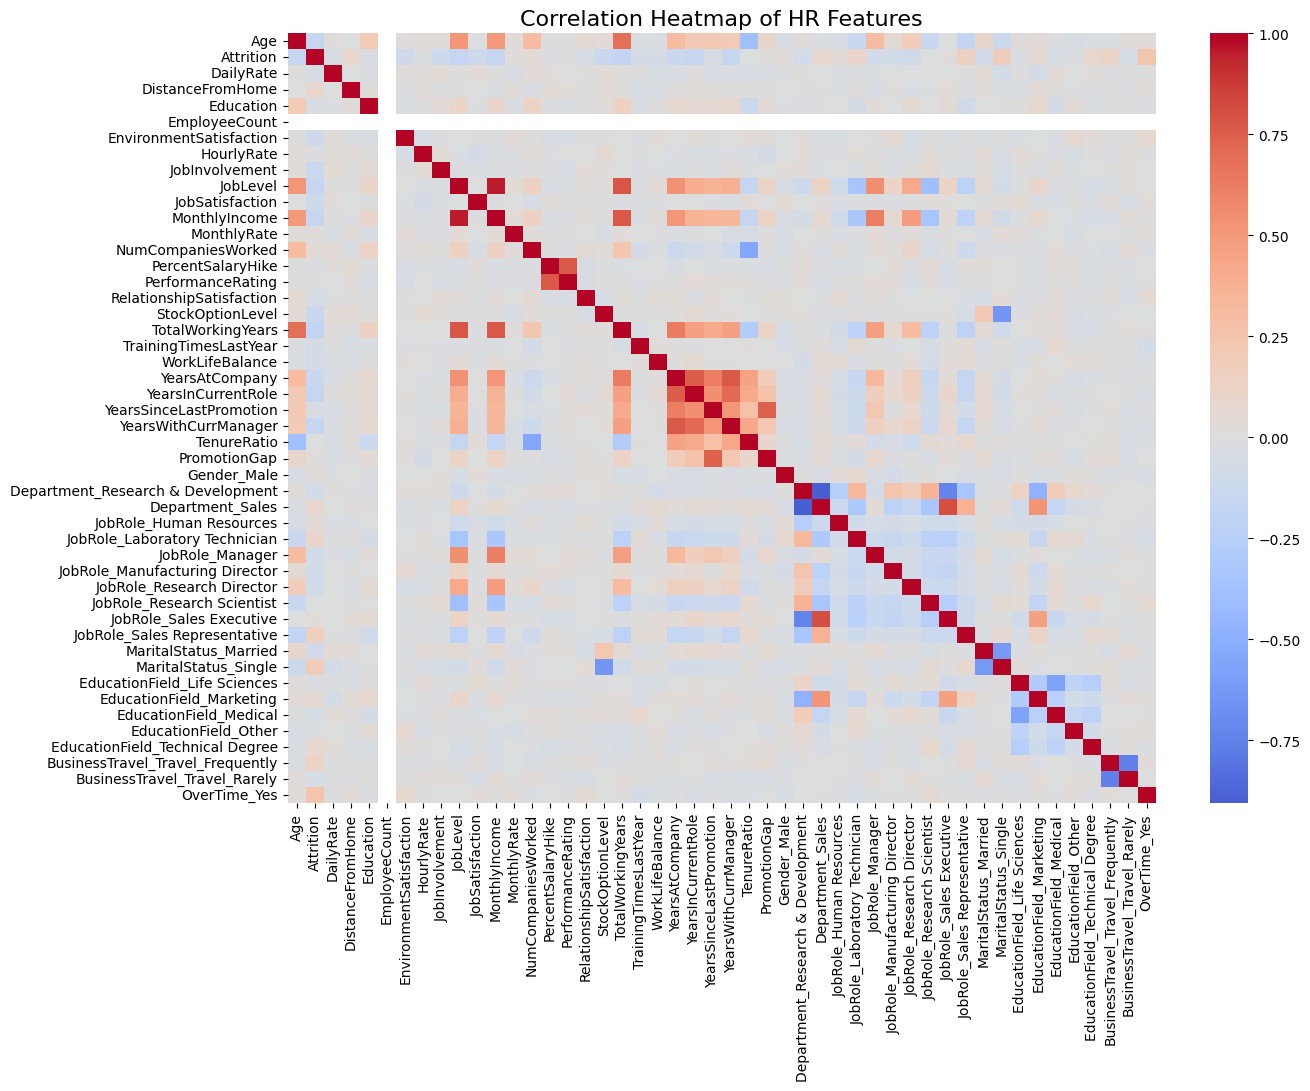

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed data
df = pd.read_csv("HR-Employee-retention-encoded.csv")

df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})

corr = df.corr()

# plot
plt.figure(figsize=(14, 10))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False, fmt=".2f")
plt.title("Correlation Heatmap of HR Features", fontsize=16)
plt.show()

LOGISTIC REGRESSION MODEL

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Load the processed data
df = pd.read_csv("HR-Employee-retention-encoded.csv")

# Target variable
y = df["Attrition"].map({"Yes": 1, "No": 0})

# Features
X = df.drop("Attrition", axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Impute missing values before scaling
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scale numerical columns after splitting
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8571428571428571

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.60      0.32      0.42        47

    accuracy                           0.86       294
   macro avg       0.74      0.64      0.67       294
weighted avg       0.84      0.86      0.84       294



DECISION TREE MODEL

Accuracy: 0.8469387755102041

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       255
           1       0.29      0.10      0.15        39

    accuracy                           0.85       294
   macro avg       0.58      0.53      0.53       294
weighted avg       0.80      0.85      0.81       294


Matrix:
 [[245  10]
 [ 35   4]]


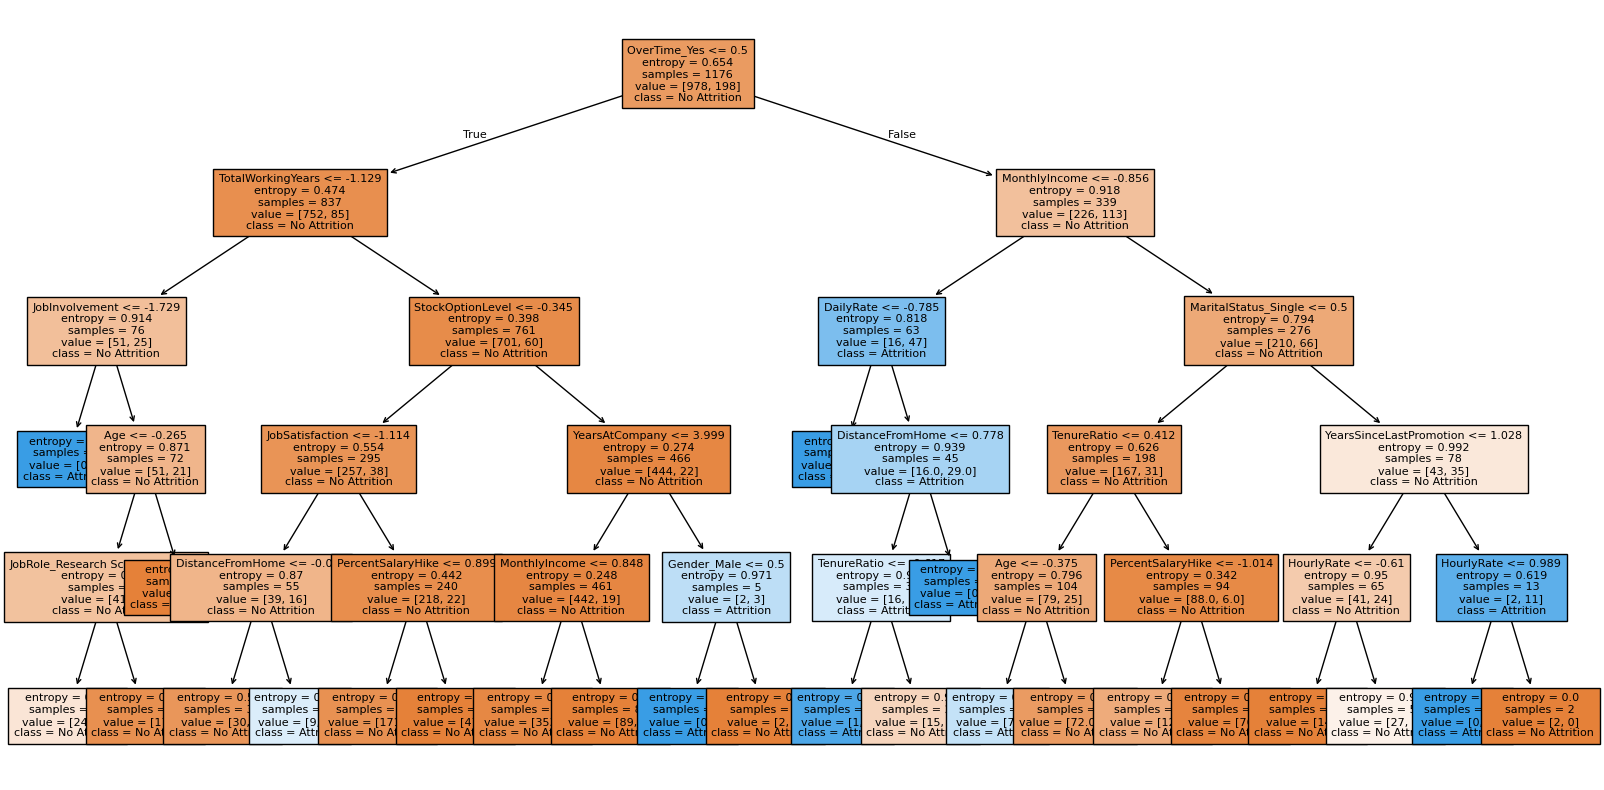

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

df = pd.read_csv("HR-Employee-retention-encoded.csv")

df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})

X = df.drop(columns=["Attrition"])
y = df["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

dt_model = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=5,
    random_state=42
)
dt_model.fit(X_train, y_train)

# Predictions
y_pred = dt_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nMatrix:\n", cm)

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=["No Attrition", "Attrition"], filled=True, fontsize=8)
plt.show()

XGBOOST MODEL

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# Load the processed data
df = pd.read_csv("HR-Employee-retention-encoded.csv")

# Target variable
y = df["Attrition"].map({"Yes": 1, "No": 0})

# Features
X = df.drop("Attrition", axis=1)

# Impute missing values before splitting
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8707482993197279

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       247
           1       0.80      0.26      0.39        47

    accuracy                           0.87       294
   macro avg       0.84      0.62      0.66       294
weighted avg       0.86      0.87      0.84       294


Confusion Matrix:
 [[244   3]
 [ 35  12]]


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [19:23:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


xgboost #2 with smote sampling


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
from sklearn.impute import SimpleImputer


# Load the processed data - make sure to load it here as well if the runtime was reset
df = pd.read_csv("HR-Employee-retention-encoded.csv")

# Target variable
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})
y = df["Attrition"]

# Features
X = df.drop("Attrition", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Impute missing values before applying SMOTE
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test) # Impute test set as well for consistency

# Apply SMOTE only to training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)


print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())

# Train XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = model.predict(X_test_imputed) # Predict using the imputed test set

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Before SMOTE: Attrition
0    986
1    190
Name: count, dtype: int64
After SMOTE: Attrition
0    986
1    986
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [19:23:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Confusion Matrix:
[[241   6]
 [ 30  17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       247
           1       0.74      0.36      0.49        47

    accuracy                           0.88       294
   macro avg       0.81      0.67      0.71       294
weighted avg       0.87      0.88      0.86       294



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import xgboost as xgb

# Save the model to Google Drive
# model.save_model('/content/drive/MyDrive/xgb_model.json')


# Save the model locally
model.save_model('xgb_model.json')

from google.colab import files
files.download('xgb_model.json')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Decision Tree Model with updated sampling

Before SMOTE: {0: 986, 1: 190}
After SMOTE: {0: 986, 1: 986}
Confusion Matrix:
[[216  31]
 [ 23  24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       247
           1       0.44      0.51      0.47        47

    accuracy                           0.82       294
   macro avg       0.67      0.69      0.68       294
weighted avg       0.83      0.82      0.82       294



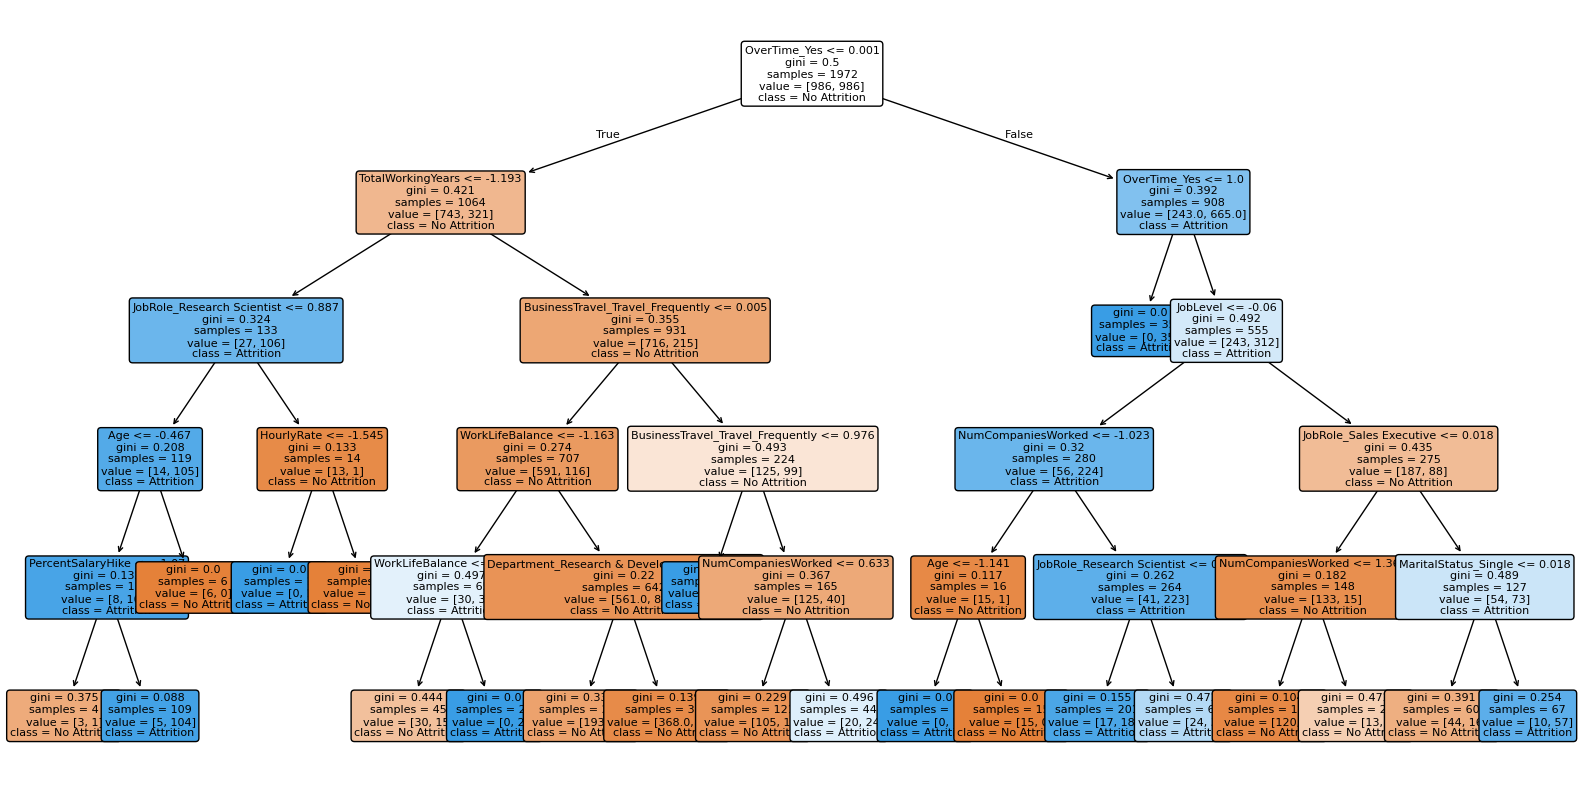

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd

# If 'HR-Employee-retention.csv' is not available, you'll need to upload or load it first.
try:
    df = pd.read_csv("HR-Employee-retention-encoded.csv")

except FileNotFoundError:
    exit()


X = df.drop("Attrition", axis=1)
y = df["Attrition"]

if y.dtype == 'object':
    y = y.map({"Yes": 1, "No": 0})


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Impute missing values before applying SMOTE
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test) # Impute test set as well for consistency


# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)


print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", y_train_resampled.value_counts().to_dict())

#Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = dt.predict(X_test_imputed) # Predict using the imputed test set


# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=["No Attrition","Attrition"],
          filled=True, rounded=True, fontsize=8)
plt.show()

In [ ]:
import joblib
from google.colab import files

joblib.dump(imputer, "imputer.pkl")

files.download("imputer.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>